### Implementing Adversarial Validation for Data Drift
Description: Create and train a classifier that distinguishes between train and test datasets, using the classifier’s performance to infer data drift.

Adversarial Validation AUC: 0.6439
No significant data drift detected (low AUC means poor separation).


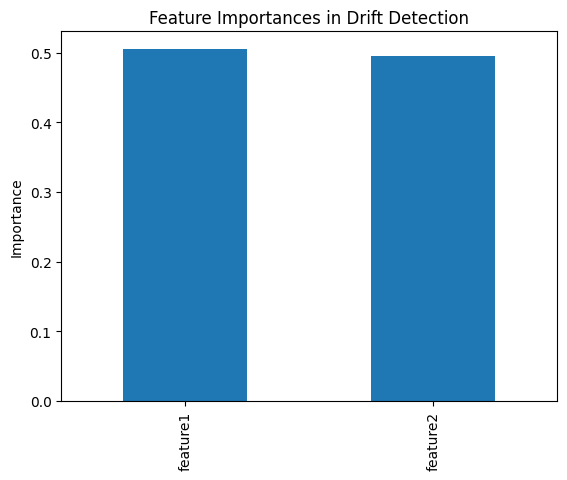

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

# Simulate tr
np.random.seed(42)
train_data = pd.DataFrame({
    'feature1': np.random.normal(0, 1, 1000),
    'feature2': np.random.normal(5, 2, 1000),
    'source': 0  # label as training data
})

# Simulate test data with slight drift
test_data = pd.DataFrame({
    'feature1': np.random.normal(0.5, 1.2, 1000),
    'feature2': np.random.normal(6, 2.5, 1000),
    'source': 1  # label as test data
})

# Combine both datasets
combined = pd.concat([train_data, test_data], ignore_index=True)
X = combined.drop('source', axis=1)
y = combined['source']

# Split into training and validation for the adversarial model
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a classifier to distinguish between train/test data
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict_proba(X_val)[:, 1]

# Evaluate with AUC score
auc = roc_auc_score(y_val, y_pred)
print(f"Adversarial Validation AUC: {auc:.4f}")
if auc > 0.7:
    print("Potential data drift detected (high AUC means good separation).")
else:
    print("No significant data drift detected (low AUC means poor separation).")

# Optional: Feature importance
importances = pd.Series(clf.feature_importances_, index=X.columns)
importances.plot(kind='bar', title='Feature Importances in Drift Detection')
plt.ylabel('Importance')
plt.show()








